# Metropolis
--------------------

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipython_animated_array import AnimateArray
import vizarray 

In [69]:
from itertools import product
bl1 =  list(product([0, 1,2,3, 4, 5],repeat = 2))
bl2 = list(product([0, 1,2],[6,7,8]))
block = np.array(bl1+bl2)
npoints = len(block)

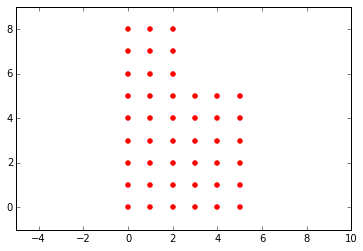

In [71]:
x_list = [x for [x, y] in block]
y_list = [y for [x, y] in block]
plt.axis('equal')
plt.scatter(x_list, y_list, marker='o', color='r')

In [59]:
diff = block.reshape(npoints,1,2) - block
D = np.sqrt((diff**2)).sum(2)
ii = range(npoints)
D[ii, ii] = np.inf 

In [60]:
def Dneighbor(r):
    tol = 10**(-3)
    if np.abs(r-1)< tol: return 0.25
    else: return 0.0 
    
Dneighbor = np.vectorize(Dneighbor, otypes=[np.float])

H = Dneighbor(D)

Notice that $H$ is not a Markov matrix

In [61]:
sc = H.sum(axis=1)
sc = 1 - sc
H[ii,ii] = sc[ii]

Now $H$ is a Markov Matrix

In [62]:
sc = H.sum(axis=1)
# H[ii,ii]

# Simulation of a random  walk in a bounded region

In [74]:
setP = range(npoints)
init = npoints/2

In [75]:
def next_step(x):
    pdf = H[x,:]
    return np.random.choice(npoints,1, p=pdf)[0]

In [88]:
next_step(init)[0]

16

In [131]:
niterations = 10*npoints
def last_pos(x):
    z, pdf = x, H[x,:]
    for i in range(niterations):
        z = np.random.choice(npoints,1, p=pdf)[0]
        pdf = H[z,:]
    return z

In [141]:
o_length = 3*npoints 
def orbit(x):
    orb = []
    z, pdf = x, H[x,:]
    orb.append(z)
    for i in range(o_length):
        z = np.random.choice(npoints,1, p=pdf)[0]
        pdf = H[z,:]
        orb.append(z)
    return orb

In [142]:
 wlk = block[orbit(init)].T

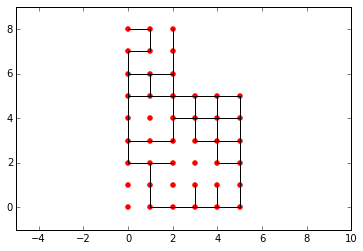

In [143]:
x_list = [x for [x, y] in block]
y_list = [y for [x, y] in block]
plt.axis('equal')
plt.scatter(x_list, y_list, marker='o', color='r')
plt.plot(wlk[0], wlk[1], color='k')

In [101]:
%time orbit(init)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 628 µs


[22, 28, 29, 23, 22, 16, 22, 21, 20, 26, 32, 26]

In [95]:
%time last_pos(init+1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.4 ms


35

# Heat map of the $H$ matrix

<matplotlib.colorbar.Colorbar instance at 0x7fcd347263f8>

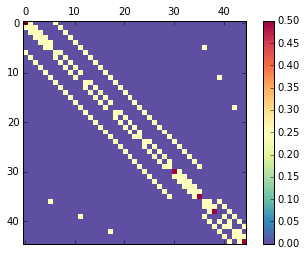

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(H,  cmap=plt.cm.Spectral_r)
fig.colorbar(cax)

In [64]:
def potence(n, M):
    if n ==1: return M
    else: return np.dot(M, potence(n-1,M))

<matplotlib.colorbar.Colorbar instance at 0x7fcd34609248>

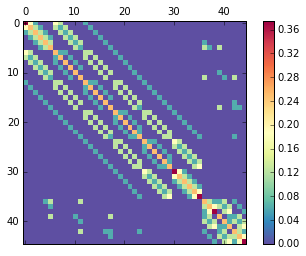

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(potence(2,H),  cmap=plt.cm.Spectral_r)
fig.colorbar(cax)

<matplotlib.colorbar.Colorbar instance at 0x7fcd344d7560>

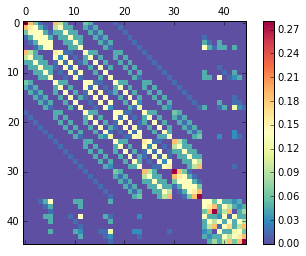

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(potence(3,H),  cmap=plt.cm.Spectral_r)
fig.colorbar(cax)

## ipython-animated-array.git

In [149]:
# https://github.com/airtoxin/ipython-animated-array.git

vizarray.set_block_size(10)
vizarray.set_cmap('Blues')
vizarray.vizarray(potence(16,H))

In [153]:


AnimateArray([
    H,
    potence(2,H),
    potence(3,H),
    potence(4,H),
    potence(5,H),
    potence(6,H),
    potence(7,H),
    potence(8,H),
    potence(9,H), 
    potence(10,H),
    potence(11,H),
    potence(12,H),
    potence(13,H),
    potence(14,H),
    potence(15,H)        
], cmap='Blues').show()

